In [66]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
def is_chinese(cp):
    cp = ord(cp)
    if ((0x4E00 <= cp <= 0x9FFF) or (0x3400 <= cp <= 0x4DBF)
            or (0x20000 <= cp <= 0x2A6DF) or (0x2A700 <= cp <= 0x2B73F)
            or (0x2B740 <= cp <= 0x2B81F) or (0x2B820 <= cp <= 0x2CEAF)
            or (0xF900 <= cp <= 0xFAFF) or (0x2F800 <= cp <= 0x2FA1F)):
        return True
    return False

def all_chinese(string):
    return string and all(is_chinese(chn) for chn in string)

def remove_punct_blank(value):
    result = re.sub('\W+', '', value).replace("_", '')
    return result

assert not all_chinese('')
assert all_chinese('今天天氣很好')
assert not all_chinese('今天天氣ａｓａｓａｓｄ很好ひらがな')
print(remove_punct_blank('今天天氣asdas-.,d123　123 !!wow?，。＄＄＄哈ひらがな哈哈'))

今天天氣asdasd123123wow哈ひらがな哈哈


### Extract text from kaldi-format data

In [4]:
data_path = '../data/all'
split_ids = os.listdir(data_path)

raw_data = []
for split_id in split_ids:
    text_path = os.path.join(data_path, split_id, 'text')
    text = open(text_path).readlines()
    raw_data.extend(text)
    
print('len:', len(raw_data))
raw_data[-5:]

len: 3729224


['zvHtS8rKTfg_664414-664540 吃不下也得吃\n',
 'zvHtS8rKTfg_664540-664714 來，多少吃一些\n',
 'zvHtS8rKTfg_664740-664870 來，奶奶\n',
 'zvHtS8rKTfg_664930-665047 拿著吧\n',
 'zvHtS8rKTfg_665657-665850 醫生，我先生...\n']

In [5]:
raw_corpus = [line.strip().split()[-1] for line in raw_data]
raw_corpus[-5:]

['吃不下也得吃', '來，多少吃一些', '來，奶奶', '拿著吧', '醫生，我先生...']

### Filter punctuations, then preserve chinese-only text. 

In [6]:
corpus = []
for i, text in enumerate(raw_corpus, start=1):
    text = remove_punct_blank(text)
    if all_chinese(text):
        corpus.append(text)
    print('%d/%d (%.2f%%)\r' % (i, len(raw_corpus), 100*i/len(raw_corpus)), end='')
print()

print('len:', len(corpus))
corpus[-5:]

3729224/3729224 (100.00%)
len: 3714088


['吃不下也得吃', '來多少吃一些', '來奶奶', '拿著吧', '醫生我先生']

### Filter overly short utterances

In [78]:
lens = np.array([len(text) for text in corpus])
print('--- Text len. ---')
print('   min: %d' % lens.min())
print('   max: %d' % lens.max())
print('median: %d' % np.median(lens))
print('  mean: %.2f' % lens.mean())
print('   std: %.2f' % lens.std())

--- Text len. ---
   min: 1
   max: 17
median: 7
  mean: 6.80
   std: 3.10


In [79]:
print('--- Accum. count ---')
for i in range(1, 18):
    count = lens[lens >= i].shape[0]
    print('len >= %d: %d' % (i, count))

--- Accum. count ---
len >= 1: 3714088
len >= 2: 3597623
len >= 3: 3316987
len >= 4: 3063888
len >= 5: 2763416
len >= 6: 2414578
len >= 7: 1996015
len >= 8: 1567734
len >= 9: 1159893
len >= 10: 801635
len >= 11: 498748
len >= 12: 262526
len >= 13: 96577
len >= 14: 365
len >= 15: 105
len >= 16: 12
len >= 17: 2


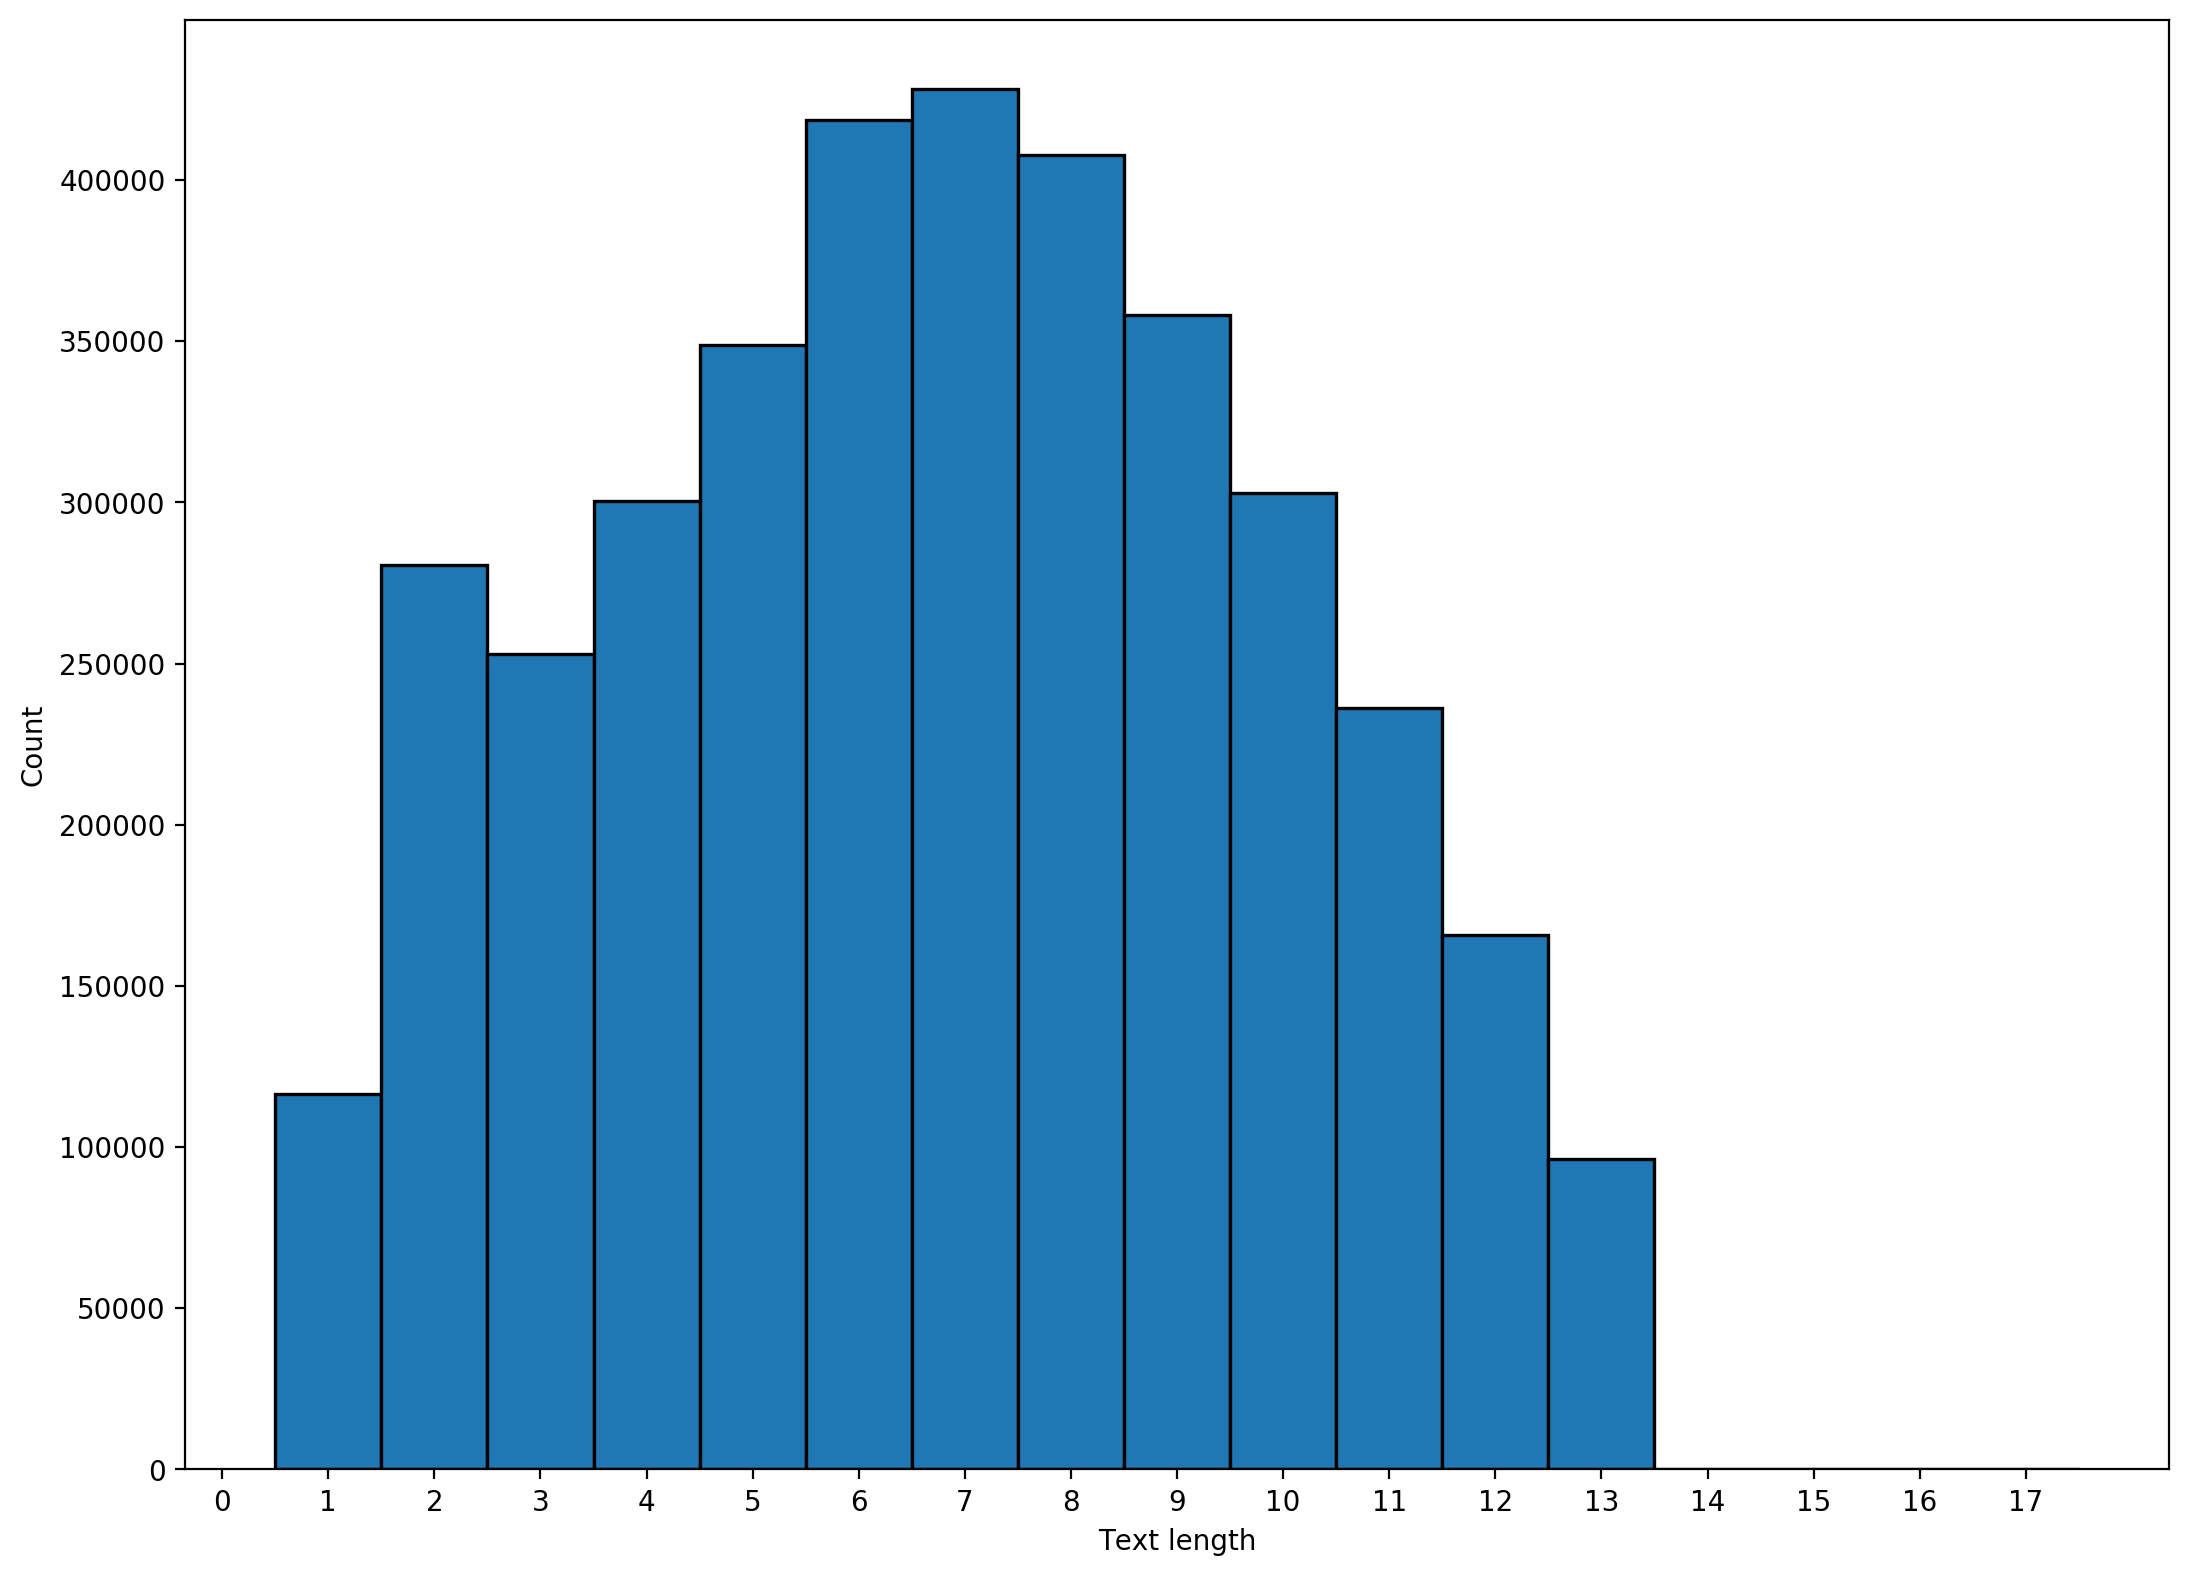

In [80]:
figure(num=None, figsize=(12.8, 9.6), dpi=200, facecolor='w', edgecolor='k')
plt.hist(lens, bins=[i+0.5 for i in range(lens.max()+1)], \
         edgecolor='black', linewidth=1.2)
plt.xticks(np.arange(0,lens.max()+1))
plt.xlabel('Text length')
plt.ylabel('Count')
plt.savefig("Taiwanese_ASR_EDA.png")
plt.show()